In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
folder_name = 'data_60'
users = pd.read_csv(f'{folder_name}/users.csv', index_col=0)
users.head()

,x,y,party
0,-0.295131,-0.675590,0
1,-0.646844,-0.645795,0
2,-0.515650,-0.439048,0
3,-0.431510,-0.454665,0
4,-0.646091,-0.554461,0


In [3]:
reactions = pd.read_csv(f'{folder_name}/reactions.csv', index_col=0)
reactions.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,0,1,1,0,1,1,1,...,0,0,1,1,0,0,0,1,1,1
1,1,1,0,0,1,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,1
2,1,1,0,0,1,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,1
3,1,1,0,0,1,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,1
4,1,1,0,0,1,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,1


In [46]:
def apply_PCA(df):
    """
    Applies PCA to the given dataframe and returns the transformed features and samples.
    """
    # Apply TruncatedSVD (similar to PCA but works better for sparse data, as in CA)
    pca = PCA(n_components=2).fit(df)

    return pca.transform(df), pca.components_.T

# Apply PCA
transformed_samples, transformed_features = apply_PCA(reactions)

# Calculating dot products
dot_product_matrix = pd.DataFrame(np.dot(transformed_samples, transformed_features.T),
                                  index=reactions.index, columns=reactions.columns) 

# Displaying the dot product matrix
predictions = dot_product_matrix + reactions.mean()
np.round(predictions)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,1.0,-0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,1.0,1.0,1.0
1,1.0,1.0,0.0,0.0,1.0,1.0,-0.0,1.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,1.0,-0.0,1.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0,1.0,-0.0,1.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,1.0,1.0,-0.0,1.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1.0,0.0,1.0,-0.0,1.0,0.0,-0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.0,0.0
296,1.0,1.0,0.0,0.0,0.0,1.0,-0.0,0.0,1.0,1.0,...,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
297,0.0,1.0,-0.0,-0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
298,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [5]:
print('MSE:',np.mean((reactions-predictions)**2))
print('ACC:',1 - np.mean(np.abs((reactions - np.round(predictions)))))

MSE: 0.060278837965974066
ACC: 0.9442666666666667


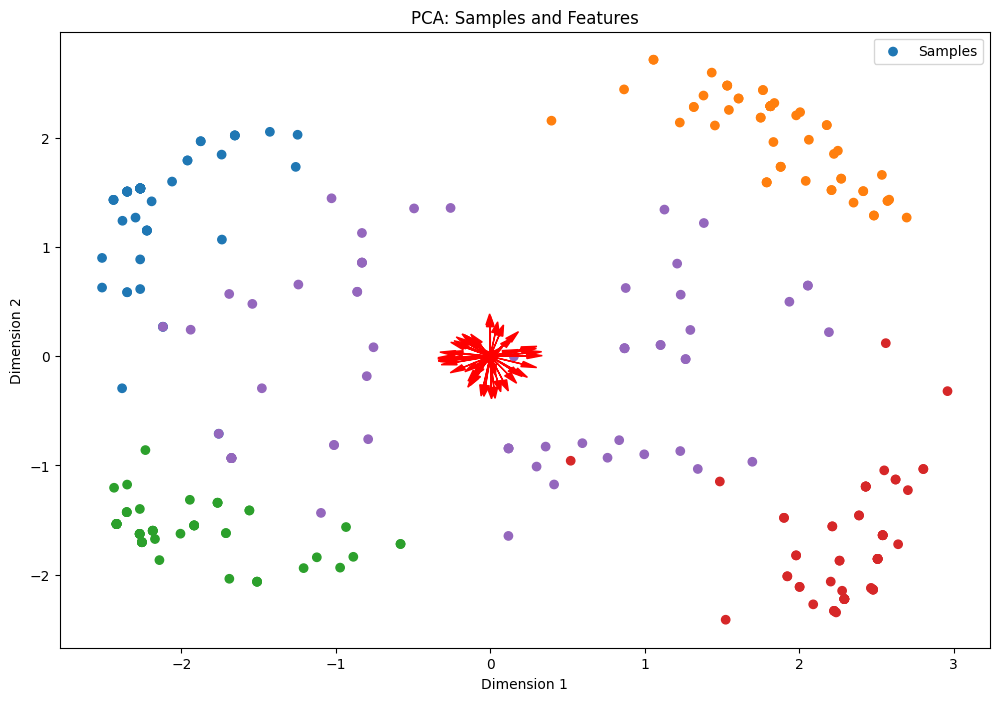

In [6]:
def visualize():
    
    # Visualization of the transformed samples and features
    plt.figure(figsize=(12, 8))

    # Plotting the samples (objects) as dots
    plt.scatter(transformed_samples[:, 0], transformed_samples[:, 1], c='C'+users.party.astype(str), label='Samples')

    # Plotting the features as red arrows
    for i, feature in enumerate(transformed_features):
        plt.arrow(0, 0, feature[0], feature[1], color='red', head_width=0.05, head_length=0.1)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('PCA: Samples and Features')
    plt.legend()
    plt.show()

visualize()

In [40]:
transformed_samplesCA[:,:2]

300

In [51]:
def apply_CA(df):
    """
    Applies Correspondence Analysis to the given dataframe and returns the transformed features and samples.
    """
    # Apply TruncatedSVD (similar to PCA but works better for sparse data, as in CA)
    svd = TruncatedSVD(n_components=2)
    svd.fit(df)
    transformed_samples = svd.transform(df)
    transformed_features = svd.components_.T

    return transformed_samples, transformed_features

# func that does the CA calculation by furrer and returns U and Vh already transformed
def caCalc(dfca):
    #ppp = dfTruthC / dfTruthC.values.sum()
    P = dfca / dfca.values.sum()
    c = P.sum().values.reshape(len(dfca.columns),1)
    r = P.sum(axis=1).values.reshape(len(dfca),1)
    P1 = r * c.T
    P2 = np.sqrt(P1)
    S = (P-P1)/P2
    # S has NaN values since P2 is dividing by 0 => fix
    U, S, Vh = sp.linalg.svd(S)
    r2 = np.sqrt(r)
    Uco = U / r2 
    c2 = np.sqrt(c)
    Vhco = Vh 
    return Uco, Vhco
    
# Apply CA
transformed_samples, transformed_features = apply_CA(reactions/reactions.values.sum())
transformed_samplesCA, transformed_featuresCA = caCalc(reactions)

# Calculating dot products
dot_product_matrix = pd.DataFrame(np.dot(transformed_samplesCA[:,:2], transformed_featuresCA[:,:2].T),
                                  index=reactions.index, columns=reactions.columns) 

# Displaying the dot product matrix
predictions = dot_product_matrix+reactions.mean()
np.round(predictions)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
296,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
297,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
298,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [52]:
print('MSE:',np.mean((reactions-predictions)**2))
print('ACC:',1 - np.mean(np.abs((reactions - np.round(predictions)))))

MSE: 0.2507270741169559
ACC: 0.6335333333333333


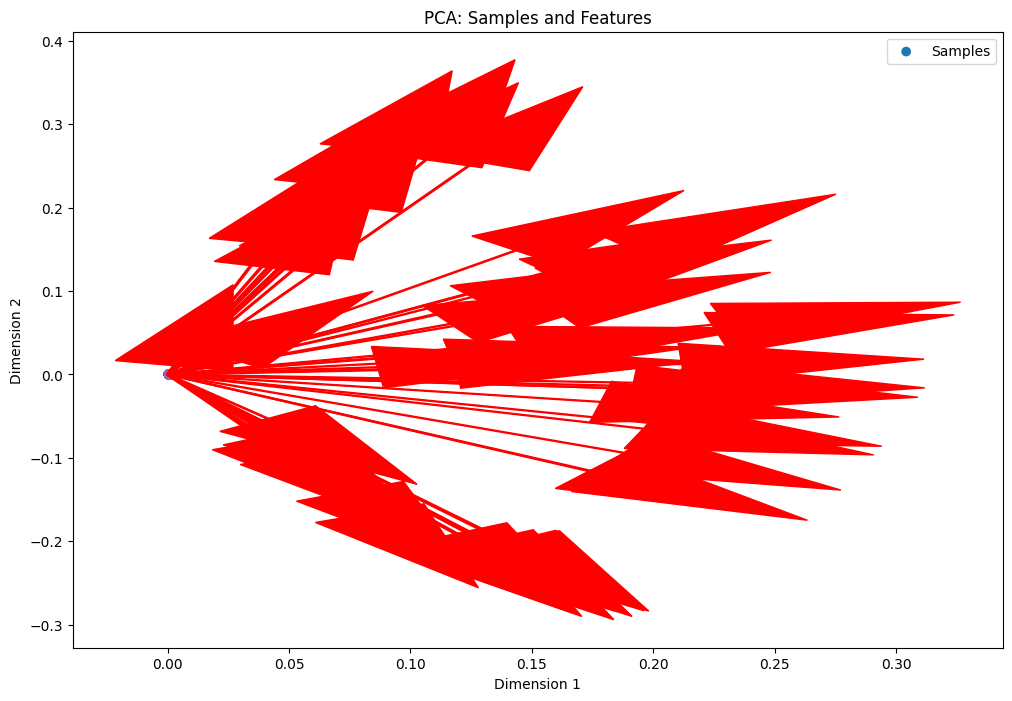

In [53]:
visualize()